In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances
import sys
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import pylab
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
pd.set_option('display.max_columns', 500)
%matplotlib inline

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


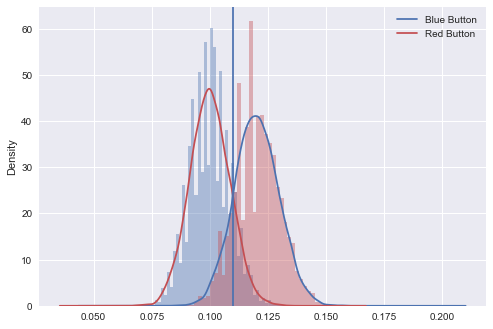

In [2]:
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)

# Set number of observations.
n_R=1200
n_B=1200

# Set conversion rates of observations.
p_R=0.1
p_B=0.12

# Set number of samples to take
samples=10000

# Sample from red and blue butotn given observed conversion rates. 
x_R = np.random.binomial(n_R, p_R, samples)/n_R
x_B = np.random.binomial(n_B, p_B, samples)/n_B

# Create pandas series
x_R=pd.Series(x_R)
x_B=pd.Series(x_B)

# Plot the results. 
x_B.plot(kind='kde',label='Blue Button',color='b')
x_R.plot(kind='kde',label='Red Button',color='r')
sns.distplot(x_R,kde=False,norm_hist=True)
sns.distplot(x_B,kde=False,color='r',norm_hist=True)


x_position = 0.11
plt.axvline(x_position)
plt.legend()

In [3]:
import scipy.stats as st
def p_value(p_T,p_C,size_T,size_C):
    var = np.sqrt(p_T*(1-p_T)/size_T + p_C*(1-p_C)/size_C)
    diff = p_T-p_C
    z_score = diff/var
    p_value = st.norm.sf(abs(z_score))
    return diff, p_value
p_values=[]
diffs=[]

In [8]:
p_R = np.mean(x_R)
p_B = np.mean(x_B)

In [9]:
p_R

0.10000258333333333

In [10]:
p_B

0.12012858333333333

In [13]:
p_value(p_R,p_B,n_R,n_B)

(-0.020126000000000005, 0.057514274514601157)

$$ N \geq 5.44\frac{\sigma^2}{\alpha^2} $$

Let's say we want to see a 1% lift.

In [42]:
p_conv = [1/N for N in range(10,100)]
sigma = [np.sqrt(p*(1-p)) for p in p_conv]
alphas = [1.1*p for p in p_conv]
N_vals = [5.44*(p*(1-p))/((0.01*p)**2) for p in p_conv]

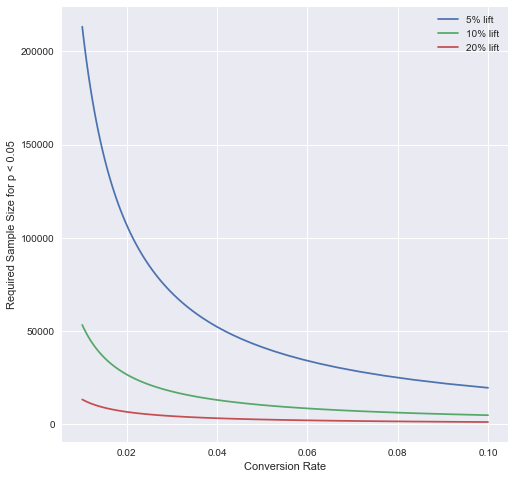

In [45]:
N_vals_1 = [5.44*(p*(1-p))/((0.01*p)**2) for p in p_conv]
N_vals_5 = [5.44*(p*(1-p))/((0.05*p)**2) for p in p_conv]
N_vals_10 = [5.44*(p*(1-p))/((0.10*p)**2) for p in p_conv]
N_vals_20 = [5.44*(p*(1-p))/((0.20*p)**2) for p in p_conv]

plt.figure(figsize=(8,8))
plt.xlabel('Conversion Rate')
plt.ylabel('Required Sample Size for p < 0.05')
plt.plot(p_conv,N_vals_5,label='5% lift')
plt.plot(p_conv,N_vals_10,label='10% lift')
plt.plot(p_conv,N_vals_20,label='20% lift')
plt.legend()

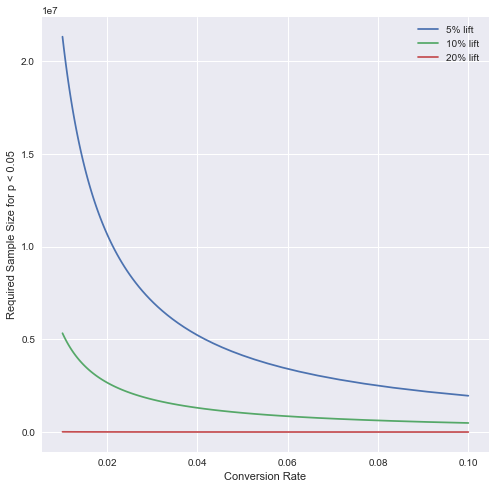

In [47]:
N_vals_1 = [5.44*(p*(1-p))/((0.001*p)**2) for p in p_conv]
N_vals_5 = [5.44*(p*(1-p))/((0.005*p)**2) for p in p_conv]
N_vals_10 = [5.44*(p*(1-p))/((0.01*p)**2) for p in p_conv]
#N_vals_20 = [5.44*(p*(1-p))/((0.20*p)**2) for p in p_conv]

plt.figure(figsize=(8,8))
plt.xlabel('Conversion Rate')
plt.ylabel('Required Sample Size for p < 0.05')
plt.plot(p_conv,N_vals_5,label='5% lift')
plt.plot(p_conv,N_vals_10,label='10% lift')
plt.plot(p_conv,N_vals_20,label='20% lift')
plt.legend()

# Testing normality

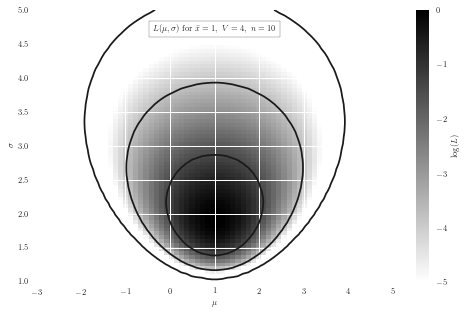

In [51]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev



def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()

In [52]:
from __future__ import division

from matplotlib import  pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from statsmodels.base.model import GenericLikelihoodModel

np.random.seed(123456789)

In [53]:
pi = 0.3
lambda_ = 2.

In [54]:
def zip_pmf(x, pi=pi, lambda_=lambda_):
    if pi < 0 or pi > 1 or lambda_ <= 0:
        return np.zeros_like(x)
    else:
        return (x == 0) * pi + (1 - pi) * stats.poisson.pmf(x, lambda_)

In [74]:
zip_pmf([3,2])

array([ 0.12631293,  0.1894694 ])

In [50]:
logL

array([[-87.39380217, -82.82333378, -78.38729093, ..., -78.38729093,
        -82.82333378, -87.39380217],
       [-77.35502431, -73.27170661, -69.3084865 , ..., -69.3084865 ,
        -73.27170661, -77.35502431],
       [-68.90070952, -65.23061338, -61.66846125, ..., -61.66846125,
        -65.23061338, -68.90070952],
       ..., 
       [ -9.03170797,  -8.84010638,  -8.65414014, ...,  -8.65414014,
         -8.84010638,  -9.03170797],
       [ -9.0637299 ,  -8.87659701,  -8.69496802, ...,  -8.69496802,
         -8.87659701,  -9.0637299 ],
       [ -9.0976192 ,  -8.91480047,  -8.73735875, ...,  -8.73735875,
         -8.91480047,  -9.0976192 ]])

# Bayesian Approach

In [4]:
import pymc

# Button had 1055 clicks and 28 sign-ups
values_R = np.hstack(([0]*(1055-28),[1]*28))

# Button B had 1057 clicks and 45 sign-ups
values_B = np.hstack(([0]*(1057-45),[1]*45))

In [8]:
# Create a uniform prior for the probabilities p_a and p_b
p_R = pymc.Uniform('p_A', 0, 1)
p_B = pymc.Uniform('p_B', 0, 1)

# Creates a posterior distribution of B - A
@pymc.deterministic
def delta(p_R = p_R, p_B = p_B):
    return p_B - p_R

In [10]:
# Create the Bernoulli variables for the observation
obs_A = pymc.Bernoulli('obs_R', p_R, value = values_R , observed = True)
obs_B = pymc.Bernoulli('obs_B', p_B, value = values_B , observed = True)

# Create the model and run the sampling
model = pymc.Model([p_R, p_B, delta, values_R, values_B])
mcmc = pymc.MCMC(model)

# Sample 1,000,000 million points and throw out the first 500,000
mcmc.sample(1000000, 500000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 111.0 sec

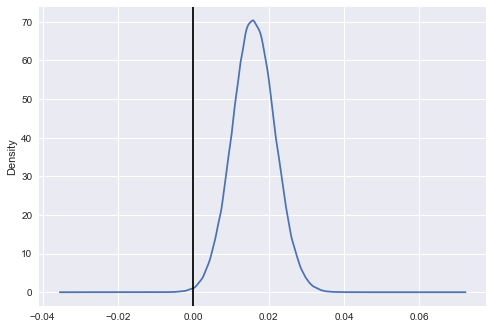

In [11]:
delta_distribution = mcmc.trace('delta')[:]
deltas = pd.Series(delta_distribution)
deltas.plot(kind="kde")
plt.axvline(0.00, color = 'black')

In [12]:
deltas

0         0.012953
1         0.014433
2         0.011623
3         0.011623
4         0.012373
5         0.011546
6         0.011546
7         0.014090
8         0.018560
9         0.020257
10        0.011574
11        0.011574
12        0.011574
13        0.011574
14        0.011574
15        0.010699
16        0.010699
17        0.010699
18        0.010699
19        0.010699
20        0.010699
21        0.016883
22        0.016883
23        0.022383
24        0.009407
25        0.009407
26        0.009407
27        0.012971
28        0.012112
29        0.014026
            ...   
499970    0.023084
499971    0.023084
499972    0.023842
499973    0.023842
499974    0.023842
499975    0.020831
499976    0.024110
499977    0.024110
499978    0.022793
499979    0.022793
499980    0.019995
499981    0.019995
499982    0.013291
499983    0.013291
499984    0.013291
499985    0.016634
499986    0.013426
499987    0.006190
499988    0.011166
499989    0.011166
499990    0.011166
499991    0.

In [88]:
from scipy.stats import norm
from scipy.stats import poisson
class ZeroInflatedPoisson(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(ZeroInflatedPoisson, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        pi = params[0]
        lambda_ = params[1]

        return -np.log(zip_pmf(self.endog, pi=pi, lambda_=lambda_))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            lambda_start = self.endog.mean()
            excess_zeros = (self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
            
            start_params = np.array([excess_zeros, lambda_start])
            
        return super(ZeroInflatedPoisson, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)
#norm.pdf(x,loc=lambda_,scale=lambda_)) #

In [67]:
class NBin(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super(NBin, self).__init__(endog, exog, **kwds)

    def nloglikeobs(self, params):
        alph = params[-1]
        beta = params[:-1]
        ll = _ll_nb2(self.endog, self.exog, beta, alph)
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        # we have one additional parameter and we need to add it for summary
        self.exog_names.append('alpha')
        if start_params == None:
            # Reasonable starting values
            start_params = np.append(np.zeros(self.exog.shape[1]), .5)
            # intercept
            start_params[-2] = np.log(self.endog.mean())
        return super(NBin, self).fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun,
                                     **kwds)

In [69]:
def _ll_nb2(y, X, beta, alph):
    mu = np.exp(np.dot(X, beta))
    size = 1/alph
    prob = size/(size+mu)
    ll = nbinom.logpmf(y, size, prob)
    return ll

In [81]:
model = ZeroInflatedPoisson(x)
results = model.fit()

Optimization terminated successfully.
         Current function value: 1.838373
         Iterations: 46
         Function evaluations: 89


/Users/dgoldma1/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [83]:
model = ZeroInflatedPoisson(x)
results = model.fit()

Optimization terminated successfully.
         Current function value: 1.586641
         Iterations: 37
         Function evaluations: 70


(array([ 404.,    0.,  182.,    0.,    0.,  183.,    0.,  123.,    0.,
           0.,   76.,    0.,   20.,    0.,    0.,    7.,    0.,    3.,
           0.,    2.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ]),
 <a list of 20 Patch objects>)

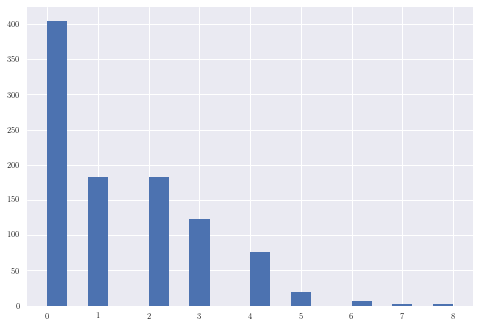

In [87]:
plt.hist(x,bins=20)

In [70]:
model = NBin(x)
results = model.fit()

AttributeError: 'NoneType' object has no attribute 'append'

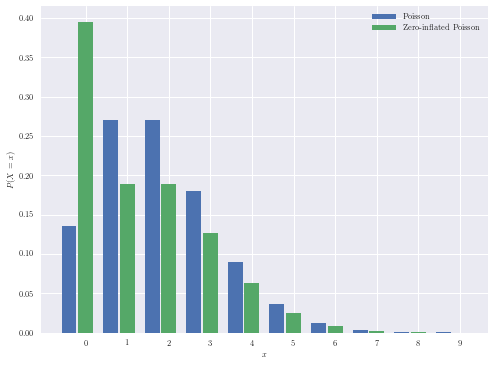

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.arange(0, 10);

palette = sns.color_palette()

ax.bar(2.5 * xs, stats.poisson.pmf(xs, lambda_), width=0.9, color=palette[0], label='Poisson');
ax.bar(2.5 * xs + 1, zip_pmf(xs), width=0.9, color=palette[1], label='Zero-inflated Poisson');

ax.set_xticks(2.5 * xs + 1);
ax.set_xticklabels(xs);
ax.set_xlabel('$x$');

ax.set_ylabel('$P(X = x)$');

ax.legend();

In [62]:
zip_pmf(xs)

array([  3.94734698e-01,   1.89469397e-01,   1.89469397e-01,
         1.26312931e-01,   6.31564655e-02,   2.52625862e-02,
         8.42086207e-03,   2.40596059e-03,   6.01490148e-04,
         1.33664477e-04])

In [57]:
N = 1000

In [59]:

inflated_zero = stats.bernoulli.rvs(pi, size=N)
x = (1 - inflated_zero) * stats.poisson.rvs(lambda_, size=N)

In [63]:
model = ZeroInflatedPoisson(x)
results = model.fit()

Optimization terminated successfully.
         Current function value: 1.586641
         Iterations: 37
         Function evaluations: 70
